<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-practice/blob/main/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [5]:
x , y = make_moons(100, noise=0.2, random_state=2)

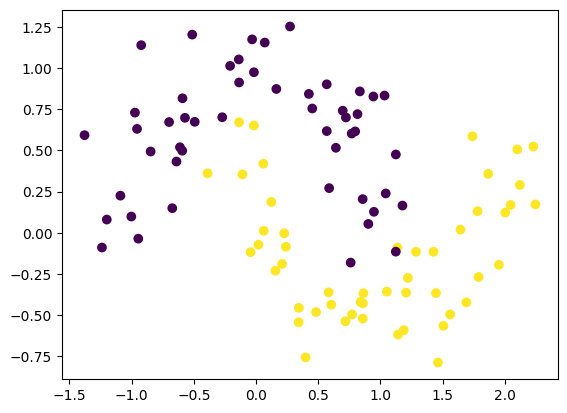

In [6]:
plt.scatter(x[:,0] , x[:,1], c=y)
plt.show()

In [9]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
history = model.fit(x, y, epochs=200, validation_split=0.2, verbose=0)


In [32]:
model.get_weights()[0].shape

(2, 128)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


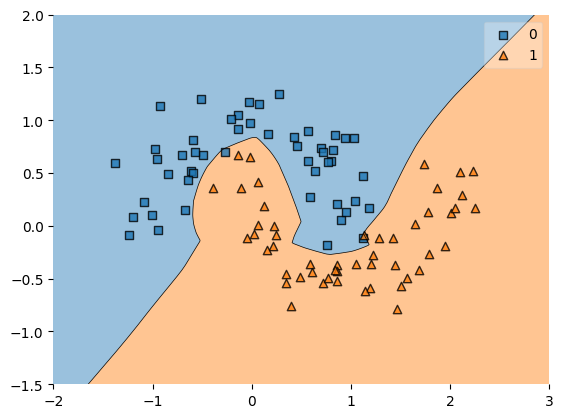

In [33]:
plot_decision_regions(x, y, clf=model)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

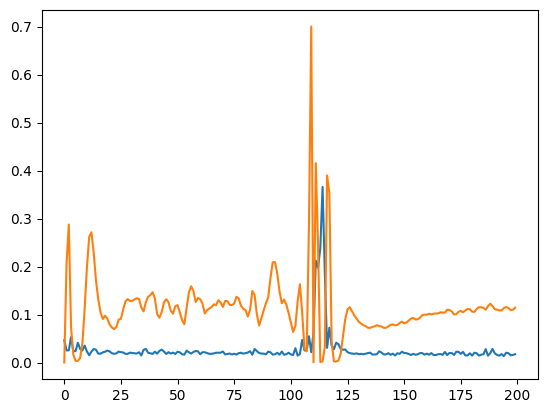

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Regularization

In [35]:
model2 = Sequential()
model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
adam=Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
history = model.fit(x, y, epochs=200, validation_split=0.2, verbose=0)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


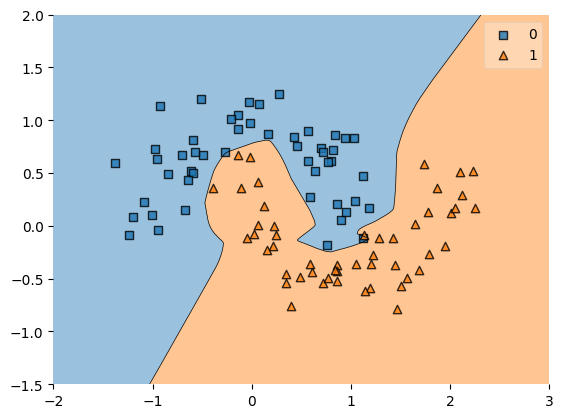

In [43]:
plot_decision_regions(x, y, clf=model)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

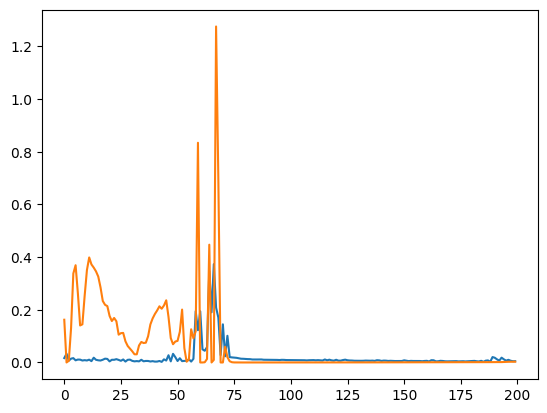

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [45]:
model_weight_layer1 = model.get_weights()[0].reshape(256)
model_weight_layer2 = model2.get_weights()[0].reshape(256)



<Axes: >

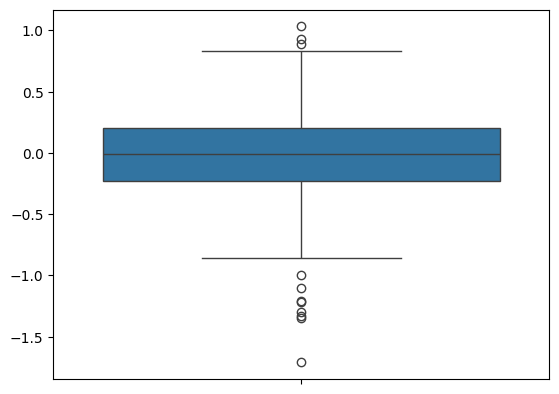

In [46]:
sns.boxplot(model_weight_layer1)

<Axes: >

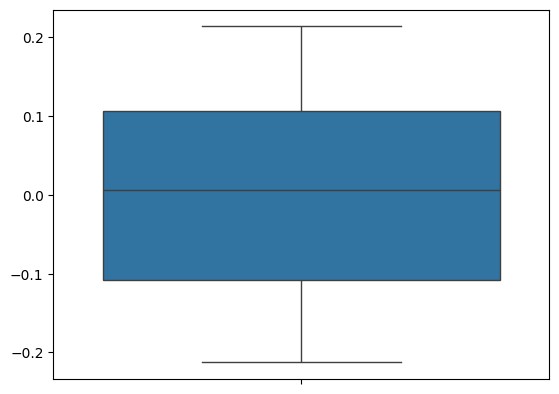

In [47]:
sns.boxplot(model_weight_layer2)

In [48]:
model_weight_layer1.max()

np.float32(1.0327579)

In [49]:
model_weight_layer2.max()

np.float32(0.2139302)

<ipython-input-50-fc8746ccd4a1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer1)
<ipython-input-50-fc8746ccd4a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer2)


<Axes: ylabel='Density'>

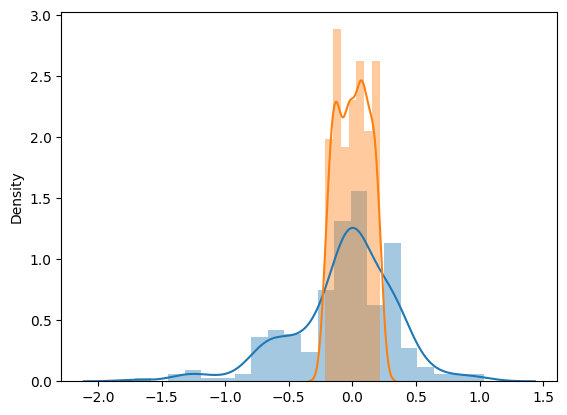

In [50]:
sns.distplot(model_weight_layer1)
sns.distplot(model_weight_layer2)